# <b>Avalia o comportamento da Rede</b>

In [1]:
# Importando as dependências
from quantumnet.objects import logger
from simulations import *
from copy import deepcopy
import matplotlib.pyplot as plt
logger.deactivate()

Parâmetros da Simulação

In [2]:
from params import *
requests = generate_traffic(request_info)
request_proactive = deepcopy(requests)
request_reactive = deepcopy(requests)
request_hybrid = deepcopy(requests)

### <b>Preenchimento Proativo</b>

Não foi possível obter o par EPR fim a fim para a requisição RE42930:7-10:0.53:8
Não foi possível obter o par EPR fim a fim para a requisição R3346E0:2-9:0.72:3
Não foi possível obter o par EPR fim a fim para a requisição R336930:7-1:0.74:1
Não foi possível obter o par EPR fim a fim para a requisição R335220:0-8:0.97:3
Não foi possível obter o par EPR fim a fim para a requisição R334E90:11-1:0.68:7
Não foi possível obter o par EPR fim a fim para a requisição R335370:6-4:0.97:10
Não foi possível obter o par EPR fim a fim para a requisição R3345C0:11-2:0.57:4
Não foi possível obter o par EPR fim a fim para a requisição RF88BF0:9-7:0.96:4
Não foi possível obter o par EPR fim a fim para a requisição RF88B30:3-10:0.64:1
Não foi possível obter o par EPR fim a fim para a requisição RF88C80:3-5:0.78:1
Não foi possível obter o par EPR fim a fim para a requisição RF88AA0:11-8:0.52:7
Não foi possível obter o par EPR fim a fim para a requisição RF88CE0:11-0:0.7:6
Não foi possível obter o par EPR f

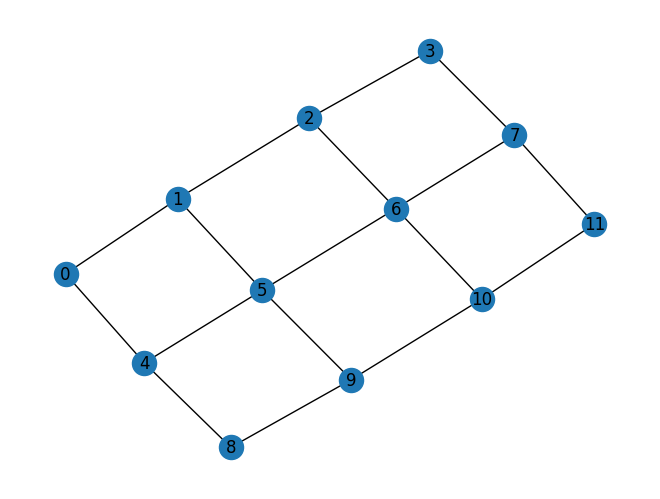

In [3]:
sim = Sim(network_info, controller_info, request_info)
sim.network.draw()
sim.set_file_data('resultados/analise_rede/proativo.csv')
sim.requests = request_proactive
sim.proactive_filling(proactive_params)
sim.proactive_process_requests()
sim.end()

### <b>Preenchimento Reativo</b>

In [4]:
# Inicializando a simulação
sim = Sim(network_info, controller_info, request_info)
sim.set_file_data('resultados/analise_rede/reativo.csv')
sim.requests = request_reactive
sim.reactive_process_requests()
sim.end()

Não foi possível obter o par EPR fim a fim para a requisição RF56B70:9-3:0.68:5
Não foi possível obter o par EPR fim a fim para a requisição R3346E0:2-9:0.72:3
Não foi possível obter o par EPR fim a fim para a requisição R336930:7-1:0.74:1
Não foi possível obter o par EPR fim a fim para a requisição R335220:0-8:0.97:3
Não foi possível obter o par EPR fim a fim para a requisição R334E90:11-1:0.68:7
Não foi possível obter o par EPR fim a fim para a requisição R335370:6-4:0.97:10
Não foi possível obter o par EPR fim a fim para a requisição RF889B0:9-1:0.96:3
Não foi possível obter o par EPR fim a fim para a requisição RF88D40:4-11:0.9:2
Não foi possível obter o par EPR fim a fim para a requisição RF88E00:3-4:0.91:10
Não foi possível obter o par EPR fim a fim para a requisição RF88E60:9-2:0.99:8
Não foi possível obter o par EPR fim a fim para a requisição RF88F80:6-0:0.94:9
Não foi possível obter o par EPR fim a fim para a requisição RF89400:7-1:0.93:8
Não foi possível obter o par EPR fim 

### <b>Preenchimento Híbrido</b>

In [5]:
# Inicializando a simulação
sim = Sim(network_info, controller_info, request_info)
sim.set_file_data('resultados/analise_rede/hibrido.csv')
sim.requests = request_hybrid
sim.proactive_filling(proactive_params)
sim.reactive_process_requests()
sim.end()

Não foi possível obter o par EPR fim a fim para a requisição R3346E0:2-9:0.72:3
Não foi possível obter o par EPR fim a fim para a requisição R336930:7-1:0.74:1
Não foi possível obter o par EPR fim a fim para a requisição R335220:0-8:0.97:3
Não foi possível obter o par EPR fim a fim para a requisição R335370:6-4:0.97:10
Não foi possível obter o par EPR fim a fim para a requisição R3345C0:11-2:0.57:4
Não foi possível obter o par EPR fim a fim para a requisição RF88BF0:9-7:0.96:4
Não foi possível obter o par EPR fim a fim para a requisição RF88B30:3-10:0.64:1
Não foi possível obter o par EPR fim a fim para a requisição RF88C80:3-5:0.78:1
Não foi possível obter o par EPR fim a fim para a requisição RF88CE0:11-0:0.7:6
Não foi possível obter o par EPR fim a fim para a requisição RF88D40:4-11:0.9:2
Não foi possível obter o par EPR fim a fim para a requisição RF88E00:3-4:0.91:10
Não foi possível obter o par EPR fim a fim para a requisição RF88E30:4-7:0.67:9
Não foi possível obter o par EPR fim

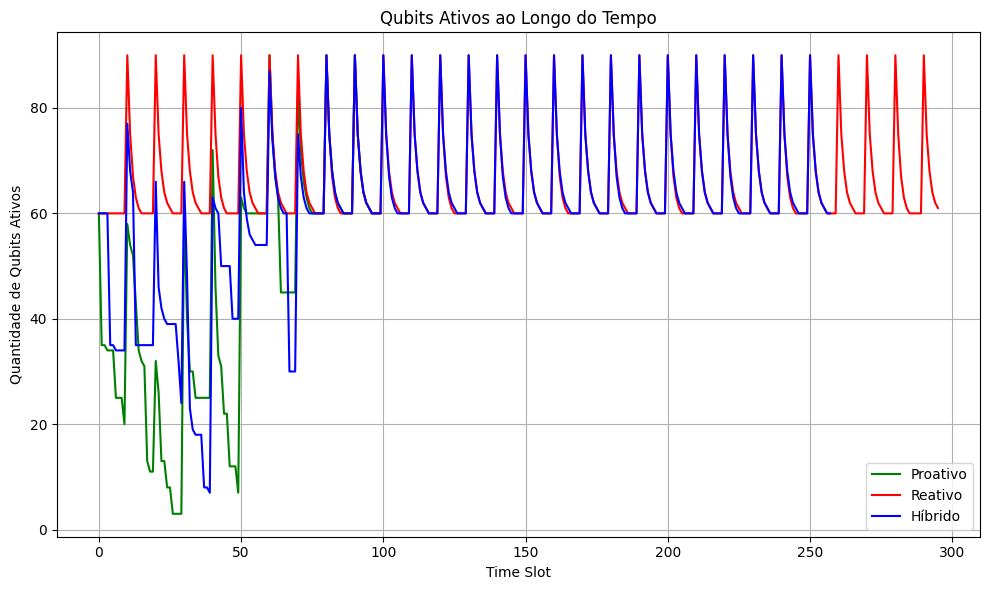

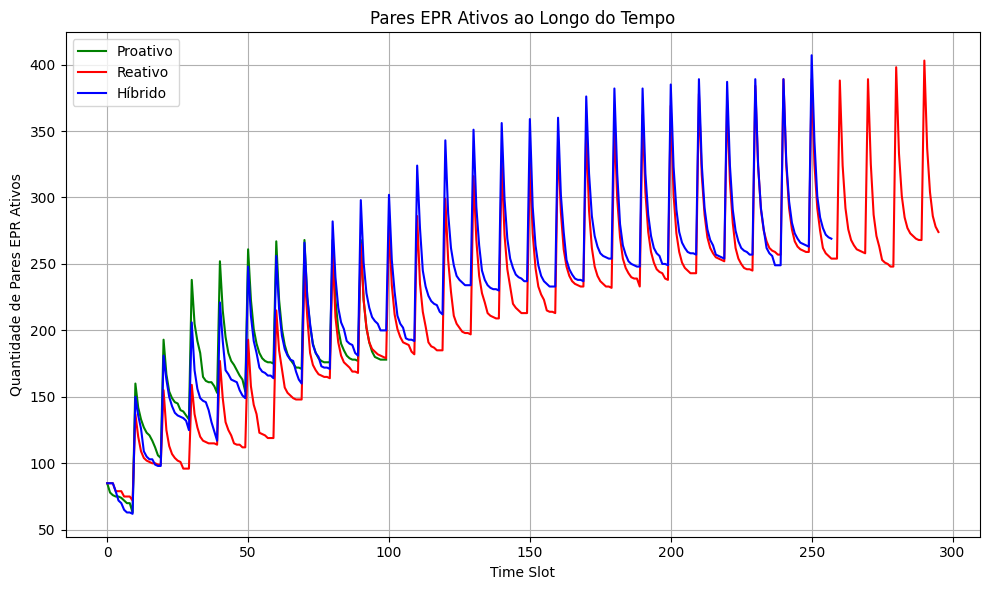

In [6]:
def plot_qubits_active_over_time(filenames, labels, colors):
    """
    Gera um gráfico do número de qubits ativos ao longo do tempo para diferentes modos.
    """
    plt.figure(figsize=(10, 6))

    for filename, label, color in zip(filenames, labels, colors):
        time_slots = []
        qubits_active = []

        # Ler os dados do arquivo CSV
        with open(filename, mode="r", newline="") as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                time_slots.append(int(row["time_slot"]))
                qubits_active.append(int(row["qubits_active"]))

        # Adicionar a linha ao gráfico
        plt.plot(time_slots, qubits_active, linestyle="-", color=color, label=label)

    # Configurações do gráfico
    plt.title("Qubits Ativos ao Longo do Tempo")
    plt.xlabel("Time Slot")
    plt.ylabel("Quantidade de Qubits Ativos")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_eprs_active_over_time(filenames, labels, colors):
    """
    Gera um gráfico do número de pares EPR ativos ao longo do tempo para diferentes modos.
    """
    plt.figure(figsize=(10, 6))

    for filename, label, color in zip(filenames, labels, colors):
        time_slots = []
        eprs_active = []

        # Ler os dados do arquivo CSV
        with open(filename, mode="r", newline="") as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                time_slots.append(int(row["time_slot"]))
                eprs_active.append(int(row["eprs_active"]))

        # Adicionar a linha ao gráfico
        plt.plot(time_slots, eprs_active, linestyle="-", color=color, label=label)

    # Configurações do gráfico
    plt.title("Pares EPR Ativos ao Longo do Tempo")
    plt.xlabel("Time Slot")
    plt.ylabel("Quantidade de Pares EPR Ativos")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Configuração dos arquivos, rótulos e cores
filenames = [
    'resultados/analise_rede/proativo.csv',
    'resultados/analise_rede/reativo.csv',
    'resultados/analise_rede/hibrido.csv'
]
labels = ['Proativo', 'Reativo', 'Híbrido']
colors = ['g', 'r', 'b']

# Gerar os gráficos
plot_qubits_active_over_time(filenames, labels, colors)
plot_eprs_active_over_time(filenames, labels, colors)
